In [1]:
from plot_fig import spectra_plot
import pandas as pd
from scipy.signal import savgol_filter as sgf
import numpy as np

In [8]:
df_1 = pd.read_csv("/Users/george/desktop/Pseudomonas_delta_fig.csv")
df_1 = df_1.replace("I","R")

In [9]:
df_1.head(2)

,label,1801.264,1799.335,1797.407,1795.478,1793.55,1791.621,1789.693,1787.764,1785.836,...,916.06,914.132,912.203,910.275,908.346,906.418,904.489,902.561,900.632,898.703
0,cefta_r-s,-0.000063,-0.000057,-0.000049,-0.000044,-0.000042,-0.000042,-0.000045,-0.000048,-0.000051,...,0.000043,-0.000019,-0.000080,-0.000128,-0.000157,-0.000165,-0.000152,-0.000123,-0.000085,-0.000045
1,cipro_r-s,-0.000044,-0.000042,-0.000037,-0.000033,-0.000031,-0.000031,-0.000035,-0.000038,-0.000040,...,0.000281,0.000218,0.000145,0.000073,0.000012,-0.000035,-0.000062,-0.000068,-0.000057,-0.000035


In [4]:
classes = list(df_1.select_dtypes(exclude="float").columns.values)
classes

['label']

# Spectral Figures For df_1

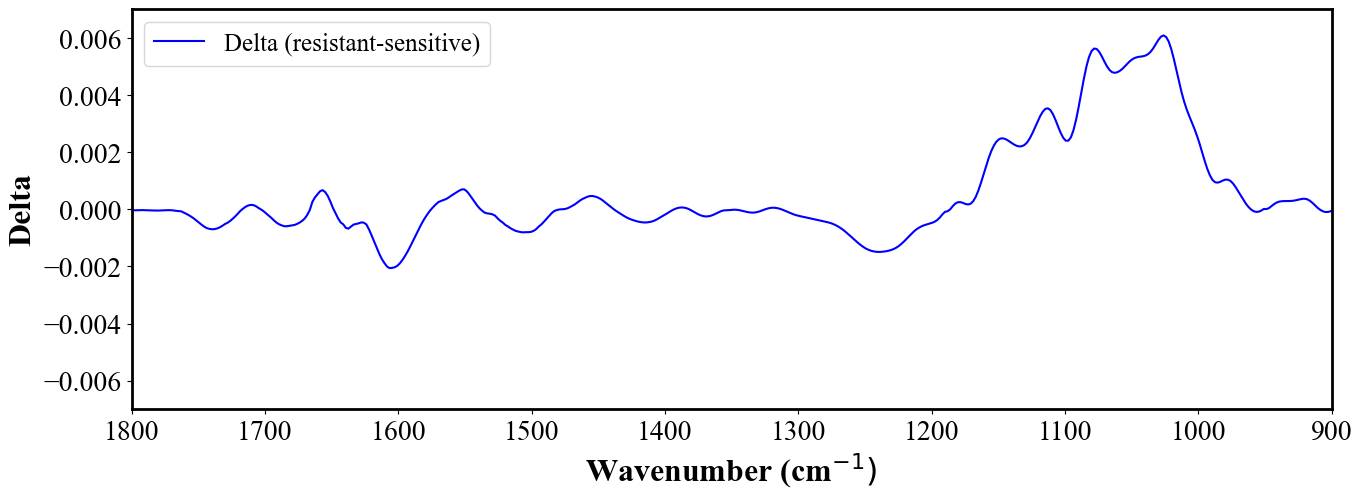

In [12]:
for ix, a in enumerate(classes):
    anti=a
    spectra_plot(df=df_1,
        label=anti,
        initial_feature='1801.264',
        final_feature='898.703',
        out_window_size_tuple_x=(1800, 900),
        out_window_size_tuple_y=(-0.007, 0.007),
        inset_axis=False,
        inset_window_position=[0.34, 0.438, 0.65, 0.54],
        labels_dict=[{'label': 'genta_r-s', 'label_legend': 'Delta (resistant-sensitive)', 'color': 'blue'}],
        confidence_iterval_width=1,
        texts_on_graph_dict=[{'which_axis': 'ax1', 'text_sentence': '', 'position_x': 1000, 'position_y': 0.025}],
        functional_groups=False,
        functional_groups_dict=[{'group_name': 'Amid I', 'arrow_position': (1655, 0.225), 'xytext': (1635, 0.245)},
                                {'group_name': 'Amid II', 'arrow_position': (1545, 0.110), 'xytext': (1525, 0.130)},
                                {'group_name': 'CH$_3$', 'arrow_position': (1455, 0.022), 'xytext': (1435, 0.042)},
                                {'group_name': 'CCO$^-$', 'arrow_position': (1400, 0.030), 'xytext': (1380, 0.050)},
                                {'group_name': 'Amid III', 'arrow_position': (1241, 0.030), 'xytext': (1221, 0.050)},
                                {'group_name': 'Carbohydrates', 'arrow_position': (1080, 0.090), 'xytext': (1060, 0.110)}],
        inset_control_x=(1180, 958),
        inset_control_y=(0, 0.1),
        legend_location=2,
        graph_item='',
        save_fig=True,
        y_title='Delta',
        x_title='Wavenumber (cm$^{-1})$',
        file_name='delta_genta_pseudo')

# Second derivative

In [6]:
first_class = classes[0]
last_class = classes[-1]

In [7]:
data = df_1
X = data.loc[:, "1801.264":'898.703'].values
X_der = sgf(X, window_length=13, polyorder=3, deriv=2, mode="nearest")
y = data.loc[:, first_class : last_class].values

Xy = np.concatenate((y,X_der), axis=1)
df_2nd = pd.DataFrame(Xy, columns=data.columns)
df_2nd.head(2)

ValueError: Shape of passed values is (360, 472), indices imply (360, 1872)

# Save CSV?

In [ ]:
save_as_csv = False
if(save_as_csv):
    df_2nd.to_csv('2nd_derivative_df_1.csv')

# Spectral Figures For df_2nd

In [ ]:
for ix, a in enumerate(classes):
    anti=a
    spectra_plot(df=df_2nd,
        label=anti,
        initial_feature='1801.264',
        final_feature='898.703',
        out_window_size_tuple_x=(1800, 900),
        out_window_size_tuple_y=(-0.0019, 0.0019),
        #out_window_size_tuple_y=(-0.0025, 0.0011),
        inset_axis=False,
        inset_window_position=[0.43, 0.07, 0.55, 0.43],
        labels_dict=[{'label': 'S', 'label_legend': 'Sensitive to '+anti, 'color': 'black'},
                     {'label': 'R', 'label_legend': 'Resistant to '+anti, 'color': 'g'}],
        confidence_iterval_width=1,
        texts_on_graph_dict=[{'which_axis': 'ax1', 'text_sentence': '', 'position_x': 1000, 'position_y': 0.025}],
        functional_groups=False,
        functional_groups_dict=[{'group_name': 'Amid I', 'arrow_position': (1655, 0.225), 'xytext': (1635, 0.245)},
                                {'group_name': 'Amid II', 'arrow_position': (1545, 0.110), 'xytext': (1525, 0.130)},
                                {'group_name': 'CH$_3$', 'arrow_position': (1455, 0.022), 'xytext': (1435, 0.042)},
                                {'group_name': 'CCO$^-$', 'arrow_position': (1400, 0.030), 'xytext': (1380, 0.050)},
                                {'group_name': 'Amid III', 'arrow_position': (1241, 0.030), 'xytext': (1221, 0.050)},
                                {'group_name': 'Carbohydrates', 'arrow_position': (1080, 0.090), 'xytext': (1060, 0.110)}],
        inset_control_x=(1180, 975),
        inset_control_y=(-0.0008, 0.0005),
        legend_location=1,
        graph_item='',
        save_fig=False,
        y_title='2$^{nd}$ Derivative',
        x_title='Wavenumber (cm$^{-1})$',
        file_name='spectra_2nd_'+a)